In [125]:
import kagglehub

path = kagglehub.dataset_download("andrewmvd/sp-500-stocks")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kozub\.cache\kagglehub\datasets\andrewmvd\sp-500-stocks\versions\1008


## 4.1 EDA and data preprocessing

### A) EDA a data preprocessing pre Vami vybrané charakteristiky z dataset

In [126]:
import pandas as pd

df_stocks = pd.read_csv(path + '/sp500_stocks.csv')
df_stocks.info(show_counts=True)
df_stocks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890274 entries, 0 to 1890273
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1890274 non-null  object 
 1   Symbol     1890274 non-null  object 
 2   Adj Close  616131 non-null   float64
 3   Close      616131 non-null   float64
 4   High       616131 non-null   float64
 5   Low        616131 non-null   float64
 6   Open       616131 non-null   float64
 7   Volume     616131 non-null   float64
dtypes: float64(6), object(2)
memory usage: 115.4+ MB


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1890269,2024-12-02,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1890270,2024-12-03,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1890271,2024-12-04,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1890272,2024-12-05,ZTS,NaN,NaN,NaN,NaN,NaN,NaN


Here we can see that the `pd_stocks` has only 32.59% of non-null values in all float columns.

C:\Users\kozub\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


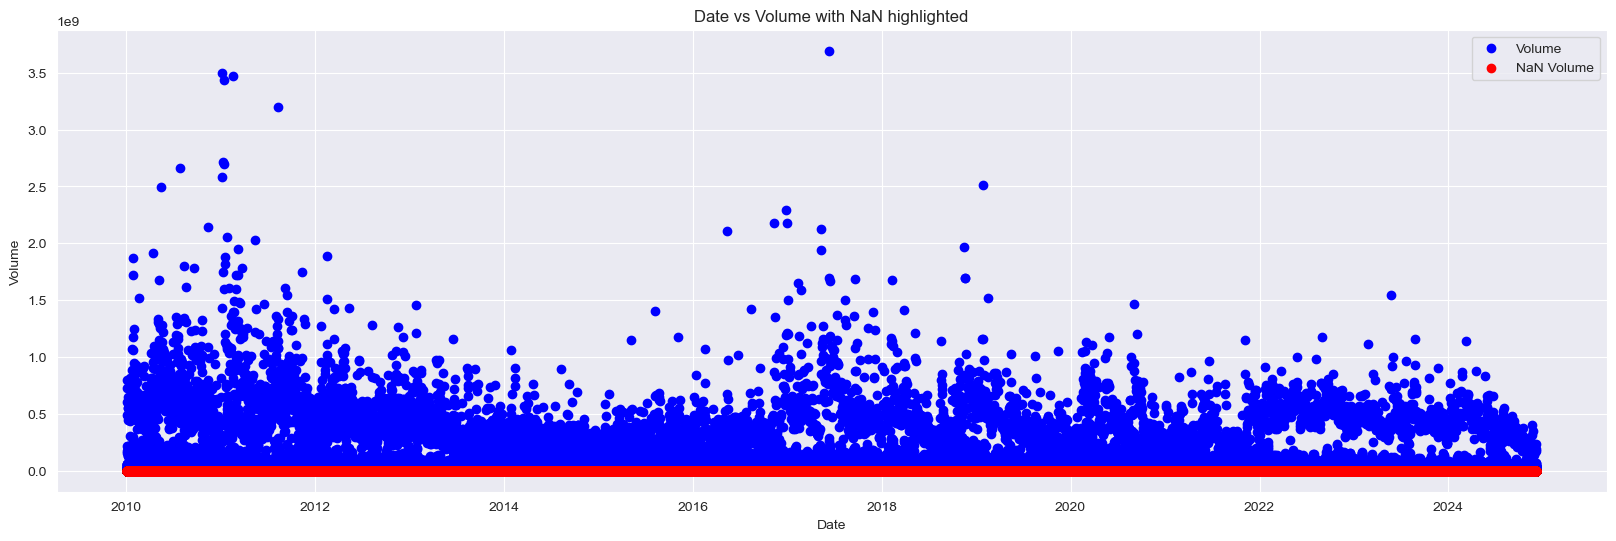

In [127]:
import matplotlib.pyplot as plt

df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

plt.figure(figsize=(20, 6))
plt.scatter(df_stocks['Date'], df_stocks['Volume'], label='Volume', color='blue')

nan_dates = df_stocks[df_stocks['Volume'].isna()]['Date']
plt.scatter(nan_dates, [0] * len(nan_dates), color='red', label='NaN Volume')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume with NaN highlighted')
plt.legend()
plt.show()

They're dispersed throughout the dataset, so we can't just drop them:

In [128]:
df_stocks.dropna(inplace=True)
df_stocks.sort_values(by='Date', ascending=True, inplace=True)
df_stocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
7516,2010-01-04,ABT,18.763714,26.129908,26.177889,25.870815,26.000362,10829095.0
898162,2010-01-04,HPQ,16.003336,23.819256,23.841963,23.306086,23.405994,27957473.0
1770018,2010-01-04,VRSK,28.762562,29.850000,30.500000,29.670000,30.410000,390000.0
93950,2010-01-04,AEE,16.076557,27.760000,28.270000,27.690001,28.030001,1299300.0
217964,2010-01-04,BAX,23.544437,31.662140,32.042370,31.309071,32.042370,11467589.0
...,...,...,...,...,...,...,...,...
590005,2024-12-06,DHI,158.509995,158.509995,163.130005,157.830002,161.940002,2265100.0
1570843,2024-12-06,SJM,116.459999,116.459999,117.180000,116.209999,116.800003,1103500.0
593763,2024-12-06,DTE,121.570000,121.570000,122.650002,121.150002,122.500000,1382000.0
623827,2024-12-06,EW,71.529999,71.529999,73.739998,71.519997,72.709999,3667000.0


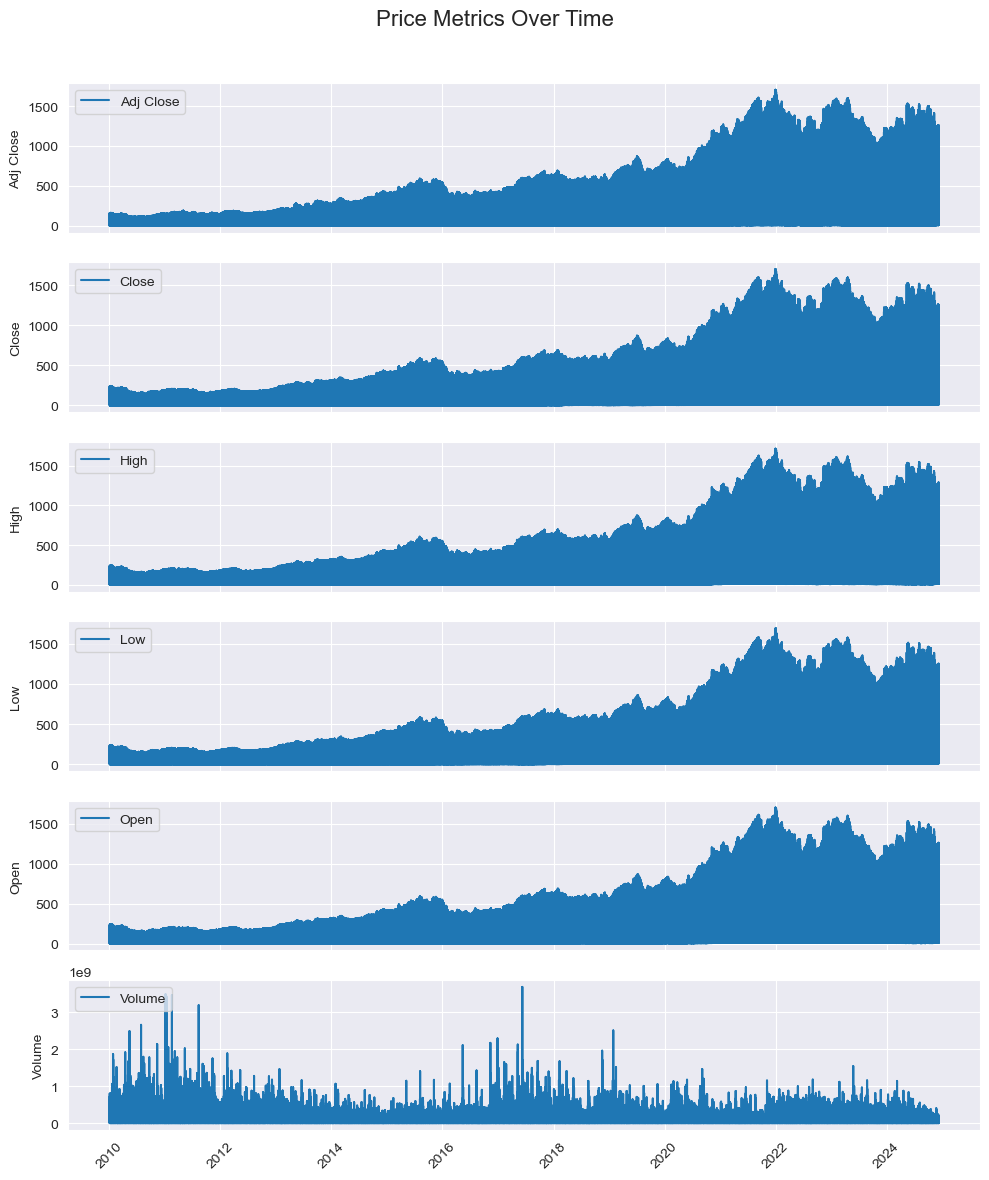

In [129]:
price_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

fig, axes = plt.subplots(len(price_columns), 1, figsize=(10, 12), sharex=True)

for ax, col in zip(axes, price_columns):
    ax.plot(df_stocks['Date'], df_stocks[col], label=col)
    ax.set_ylabel(col)
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)

fig.suptitle('Price Metrics Over Time', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [130]:
df_index = pd.read_csv(path + '/sp500_index.csv')
df_index.info()
df_index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


,Date,S&P500
0,2014-12-08,2060.31
1,2014-12-09,2059.82
2,2014-12-10,2026.14
3,2014-12-11,2035.33
4,2014-12-12,2002.33
...,...,...
2512,2024-12-02,6047.15
2513,2024-12-03,6049.88
2514,2024-12-04,6086.49
2515,2024-12-05,6075.11


The `pd_index` dataset has 0.0% of non-null values in all columns.

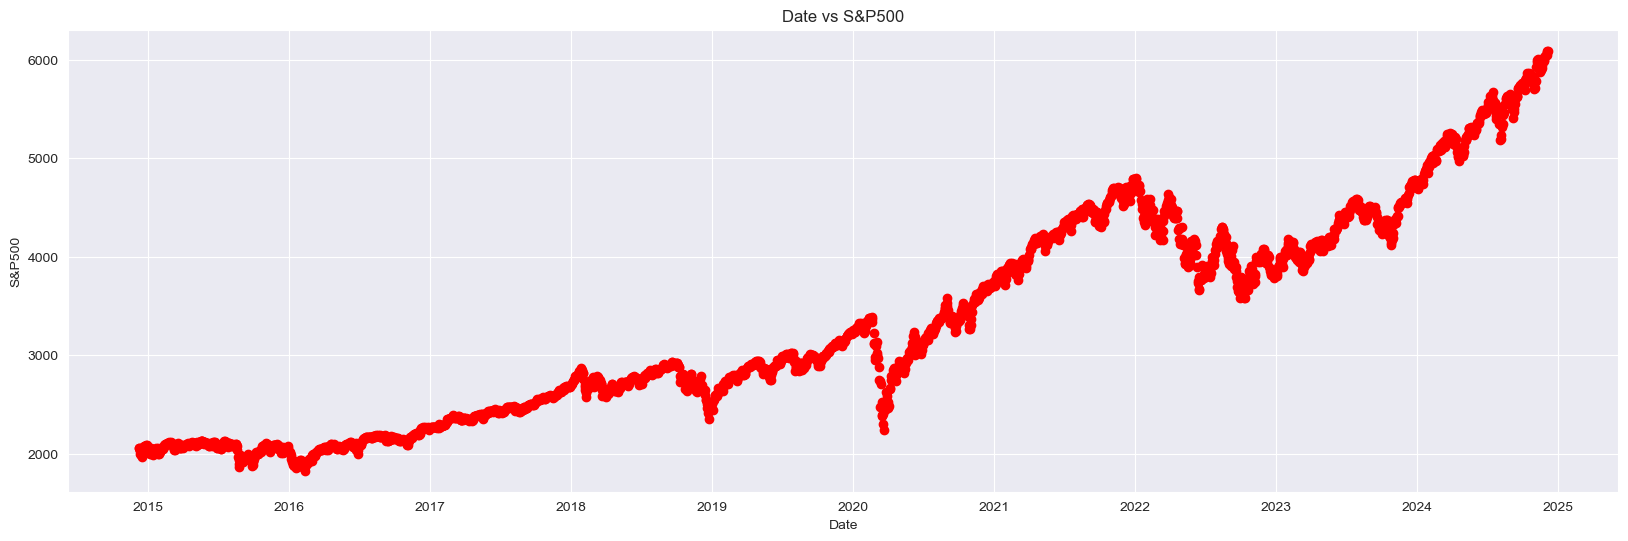

In [131]:
df_index['Date'] = pd.to_datetime(df_index['Date'])

plt.figure(figsize=(20, 6))
plt.scatter(df_index['Date'], df_index['S&P500'], label='S&P500', color='red')
plt.xlabel('Date')
plt.ylabel('S&P500')
plt.title('Date vs S&P500')
plt.show()

In [132]:
df_companies = pd.read_csv(path + '/sp500_companies.csv')
df_companies.info()
df_companies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        500 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    494 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,242.84,3670720643072,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as well as advertising services include third-party licensing arrangements and its own advertising platforms. In addition, the company offers various subscription-based services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple Pay, a cashless payment service, as well as licenses its intellectual property. The company serves consumers, and small and mid-sized businesses; and the education, enterprise, and government markets. It distributes third-party applications for its products through the App Store. The company also sells its products through its retail and online stores, and direct sales force; and third-party cellular network carriers, wholesalers, retailers, and resellers. Apple Inc. was founded in 1976 and is headquartered in Cupertino, California.",0.064600
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,142.44,3488355713024,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networking segment comprises Data Center computing platforms and end-to-end networking platforms, including Quantum for InfiniBand and Spectrum for Ethernet; NVIDIA DRIVE automated-driving platform and automotive development agreements; Jetson robotics and other embedded platforms; NVIDIA AI Enterprise and other software; and DGX Cloud software and services. The company's products are used in gaming, professional visualization, data center, and automotive markets. It sells its products to original equipment manufacturers, original device manufacturers, system integrators and distributors, independent software vendors, cloud service providers, consumer internet companies, add-in board manufacturers, distributors, automotive manufacturers and tier-1 automotive suppliers, and other ecosystem participants. NVIDIA Corporation was incorporated in 1993 and is headquartered in Santa Clara, California.",0.061391
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,443.57,3297889746944,1.365520e+11,0.160,Redmond,WA,United States,228000.0,"Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft 

From www.kaggle.com/datasets/andrewmvd/sp-500-stocks we can see that the `pd_companies`'s `Currentprice`, `Marketcap`, `Sector` are defined by its current date, for now it's – "2024-12-06T20:01:03". Because of that fact they couldn't be used in the analysis of predicting the S&P500 index. Due to that we're dropping them.

In [133]:
# we will create pivoted (prefixed) columns by each stock to merge with S&P500 index by date
pivoted_stocks = df_stocks.pivot(
    index='Date', columns='Symbol',
    values=['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
)
pivoted_stocks.info(show_counts=True)
print('\n')

# how many NaN values are there in the pivoted_stocks
nan_columns = pivoted_stocks.isna().sum()
nan_columns = nan_columns[nan_columns > 0]

print(f"number of columns with NaN values: {len(nan_columns)}")
print(f"columns with NaN values and their counts: {nan_columns}")
print('\n')

# do we have duplicated dates in the pivoted_stocks
duplicated_dates = pivoted_stocks.index.duplicated()
duplicated_dates = duplicated_dates[duplicated_dates]
print(f"number of duplicated dates: {len(duplicated_dates)}")
print(f"duplicated dates: {duplicated_dates}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3758 entries, 2010-01-04 to 2024-12-06
Columns: 1038 entries, ('Adj Close', 'AAPL') to ('Volume', 'ZBH')
dtypes: float64(1038)
memory usage: 29.8 MB


number of columns with NaN values: 174
columns with NaN values and their counts:            Symbol
Adj Close  ABBV       754
           ABNB      2754
           ALLE       976
           AMCR       596
           AMTM      3705
                     ... 
Volume     NWSA       870
           PANW       642
           QRVO      1258
           SYF       1151
           VST       1701
Length: 174, dtype: int64


number of duplicated dates: 0
duplicated dates: []


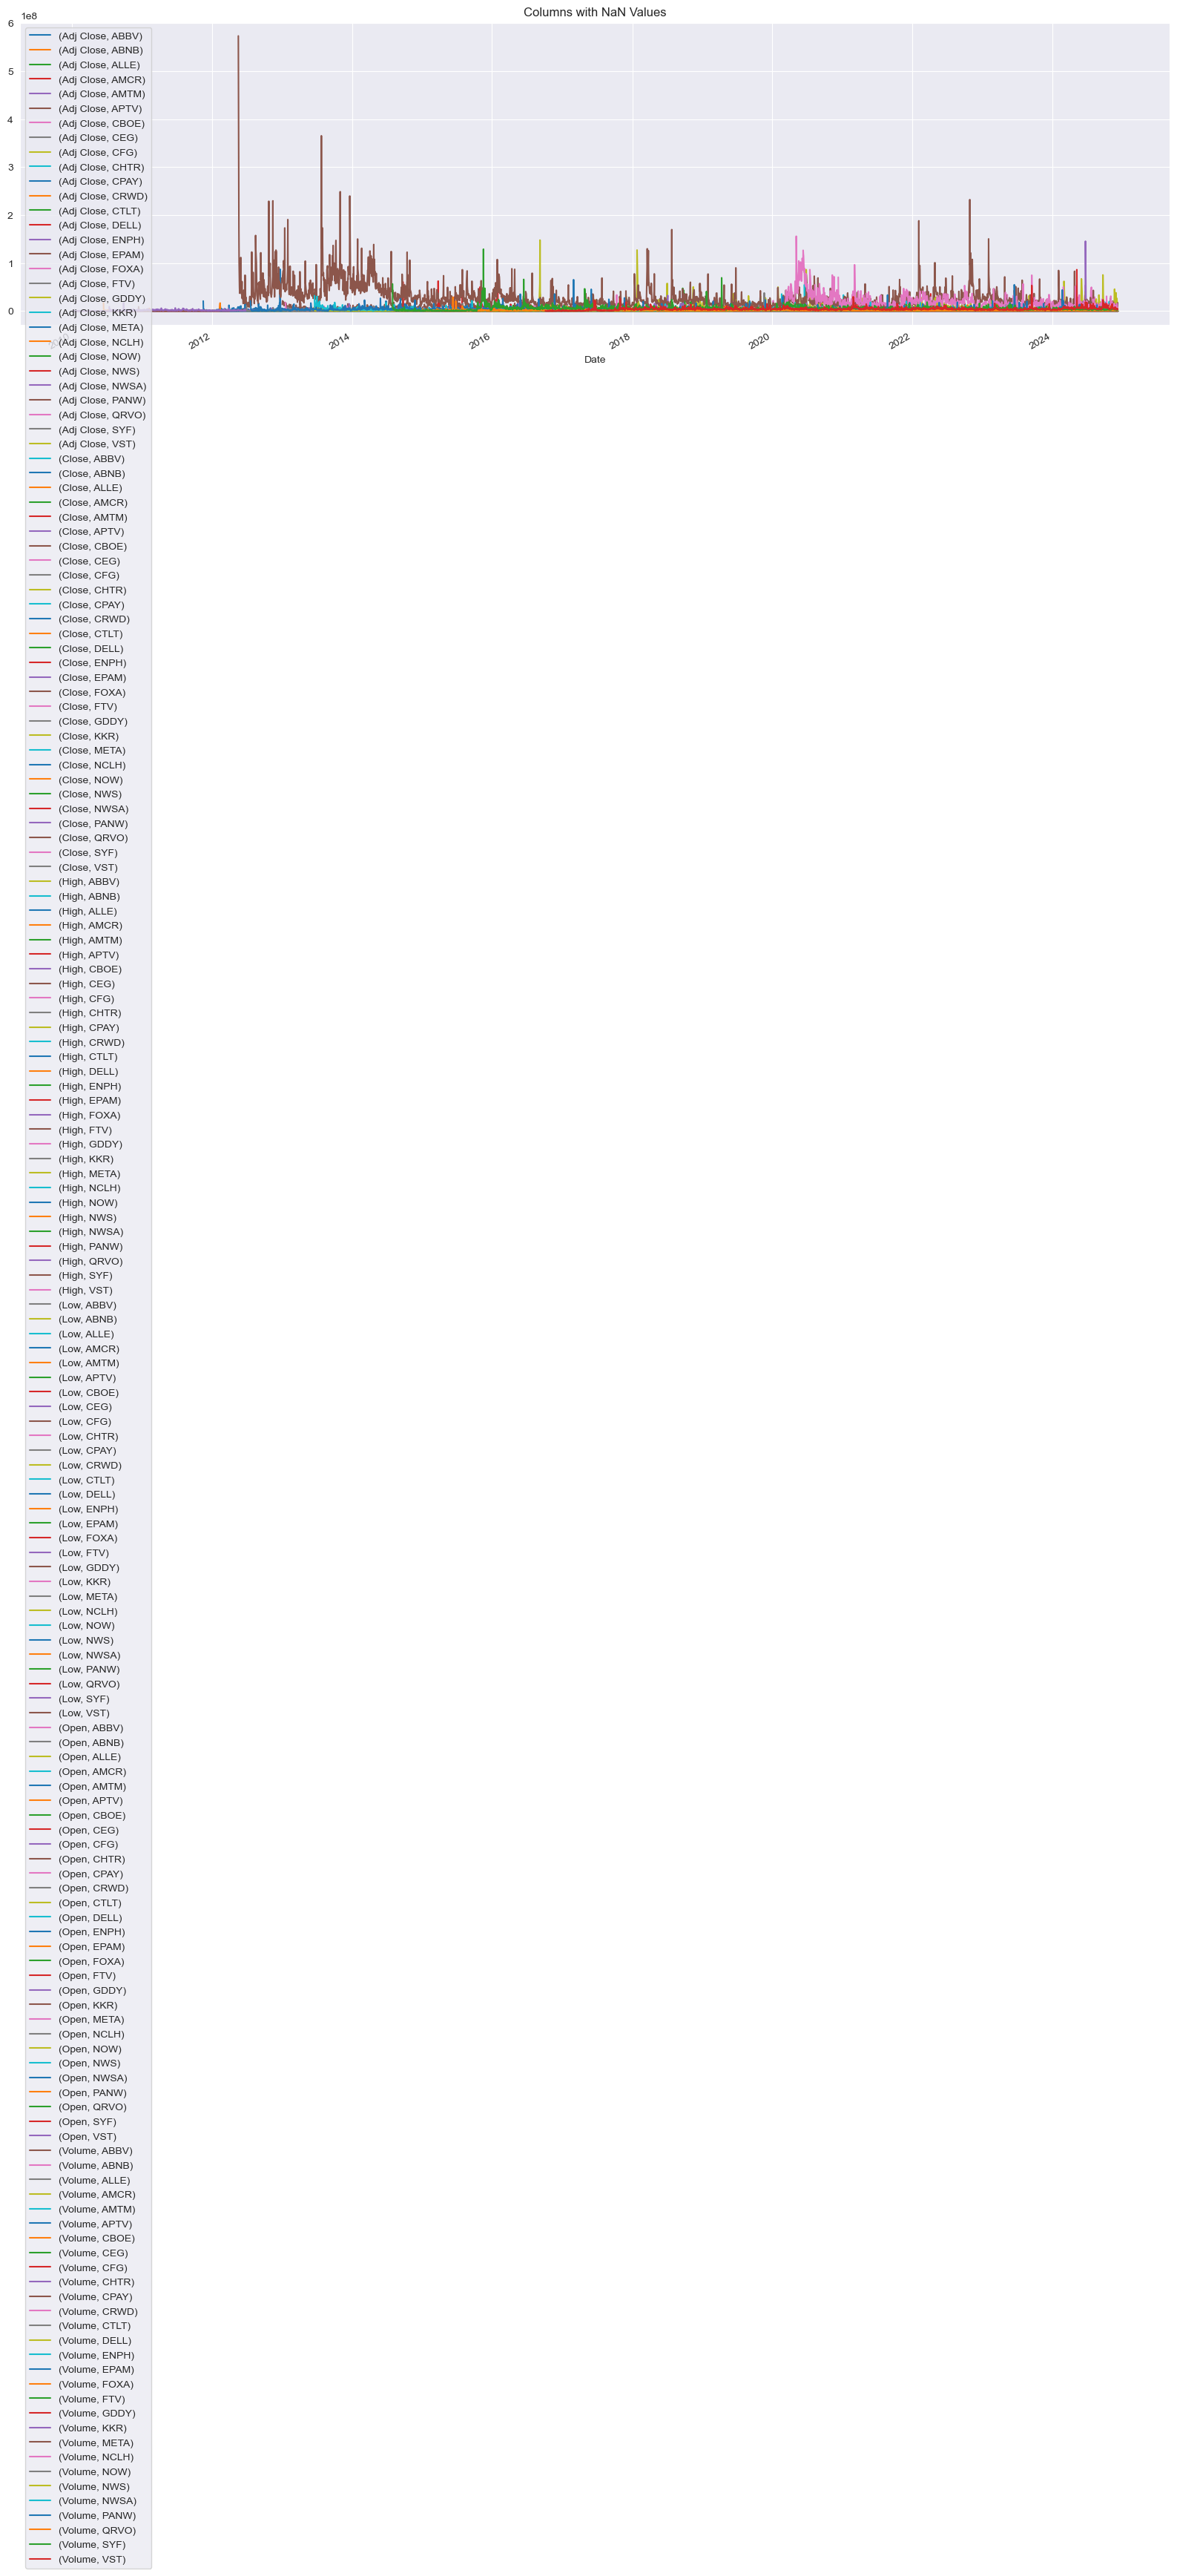

In [134]:
plt.figure(figsize=(20, 6))

for col in nan_columns.index:
    pivoted_stocks[col].plot(label=col)

plt.title('Columns with NaN Values')
plt.legend()
plt.show()

The prices for stocks that haven't existed before we can fill with just zeros, because they don't cost anything:

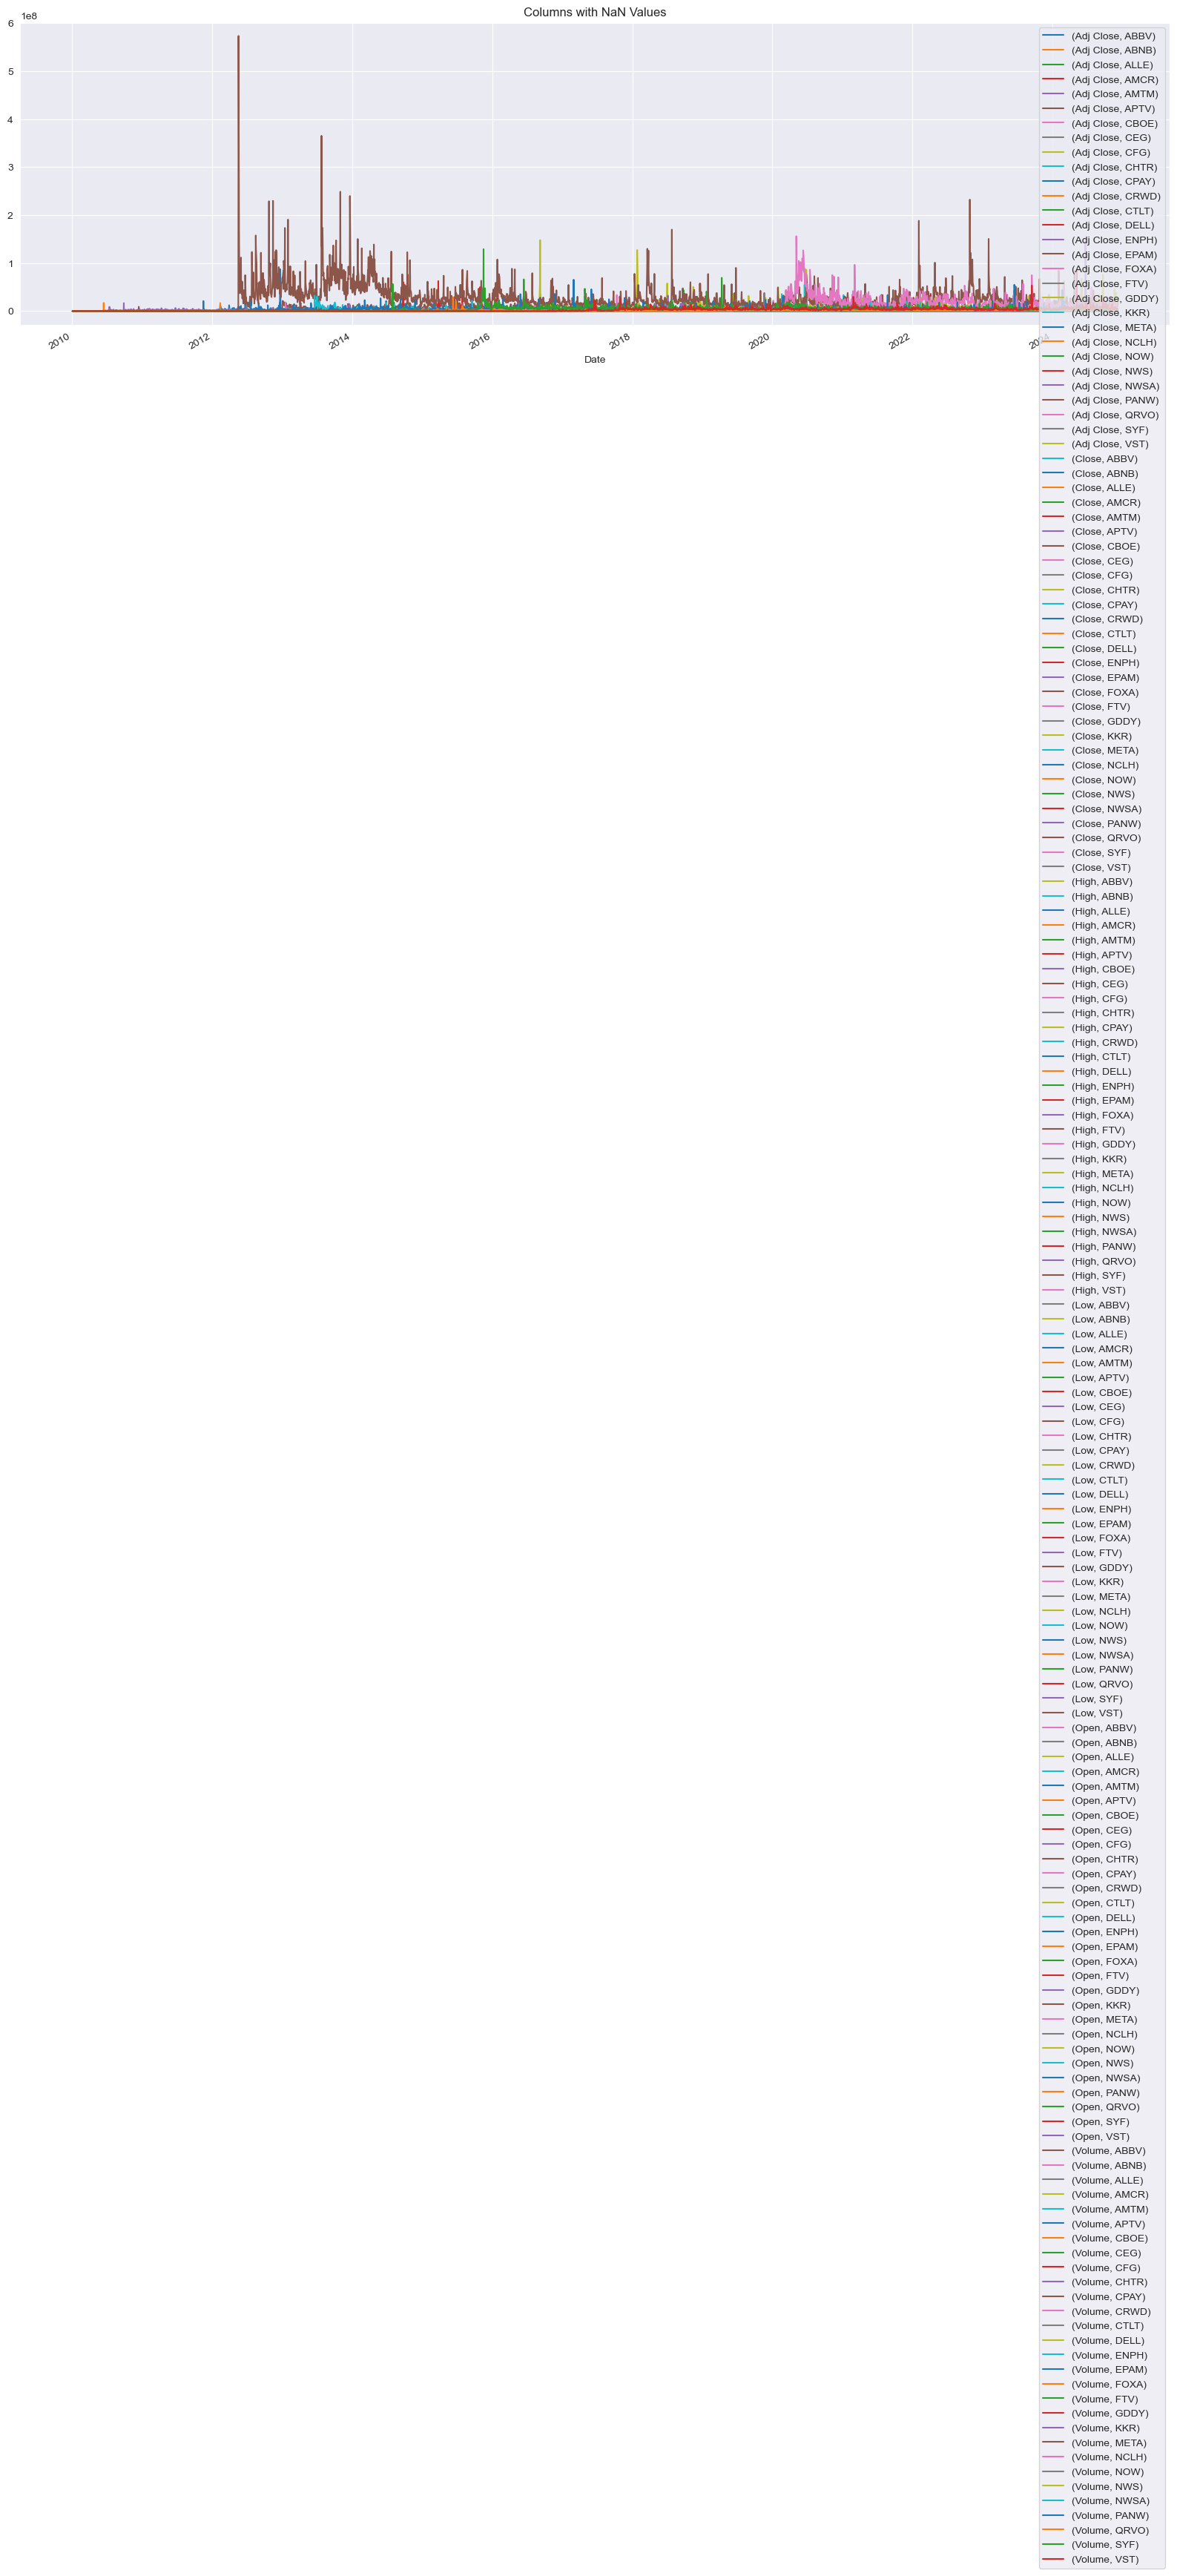

In [135]:
pivoted_stocks.fillna(0, inplace=True)

old_nan_columns = nan_columns

plt.figure(figsize=(20, 6))

for col in old_nan_columns.index:
    pivoted_stocks[col].plot(label=col)

plt.title('Columns with NaN Values')
plt.legend()
plt.show()

In [136]:
pivoted_stocks.columns = [''.join(col).strip() for col in pivoted_stocks.columns.values]
df = pd.merge(pivoted_stocks, df_index, on='Date', how='inner')
df.info(show_counts=True)
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Columns: 1040 entries, Date to S&P500
dtypes: datetime64[ns](1), float64(1039)
memory usage: 20.0 MB


Index(['Date', 'Adj CloseAAPL', 'Adj CloseABBV', 'Adj CloseABNB',
       'Adj CloseABT', 'Adj CloseADSK', 'Adj CloseAEE', 'Adj CloseAIG',
       'Adj CloseAIZ', 'Adj CloseAKAM',
       ...
       'VolumeVTRS', 'VolumeWBD', 'VolumeWM', 'VolumeWMB', 'VolumeWMT',
       'VolumeWRB', 'VolumeWY', 'VolumeYUM', 'VolumeZBH', 'S&P500'],
      dtype='object', length=1040)

In [137]:
df.sort_values(by='Date', ascending=True, inplace=True)
df['Date']

0      2014-12-08
1      2014-12-09
2      2014-12-10
3      2014-12-11
4      2014-12-12
          ...    
2512   2024-12-02
2513   2024-12-03
2514   2024-12-04
2515   2024-12-05
2516   2024-12-06
Name: Date, Length: 2517, dtype: datetime64[ns]

In [138]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# horizons to predict
horizon_day = 1
horizon_week = 5
horizon_month = 22
total_outputs = 1 + horizon_week + horizon_month

feature_columns = df.columns.drop(['Date'])
data_values = df[feature_columns].values
sp500_values = df['S&P500'].values

# create multistep targets
max_index = len(sp500_values) - horizon_month
X_list = []
Y_list = []
for i in range(max_index):
    X_list.append(data_values[i])
    next_day_val = sp500_values[i + 1]
    next_week_vals = sp500_values[i + 1:i + 1 + horizon_week]
    next_month_vals = sp500_values[i + 1:i + 1 + horizon_month]
    Y_combined = np.concatenate(([next_day_val], next_week_vals, next_month_vals))
    Y_list.append(Y_combined)

X_array = np.array(X_list)
Y_array = np.array(Y_list)

# scaling
scaler_x = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_x.fit_transform(X_array)
scaler_y = MinMaxScaler(feature_range=(0, 1))
Y_scaled = scaler_y.fit_transform(Y_array)

train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
Y_train, Y_test = Y_scaled[:train_size], Y_scaled[train_size:]

### B) Zdôvodnite výber ML/DL metód vzhľadom na Vami vybraný dataset pre 4.2

For our dataset representing a time series (S&P500 historical values), LSTM and other DL methods are more suitable than classical ML because they can handle the sequential nature of the data, capture long term dependencies and non-linear relationships. This provides better preconditions for more accurate and robust index predictions.

## 4.2 Modeling and evaluation

### A) Modeluje Vami tie vybrané charakteristiky pomocou vhodných ML/DL	metód. Výsledok modelovania je najlepší model.

In [157]:
from keras.src.legacy.preprocessing.sequence import TimeseriesGenerator

look_back = 1
train_data_gen = TimeseriesGenerator(X_train, Y_train, length=look_back, batch_size=16)
test_data_gen = TimeseriesGenerator(X_test, Y_test, length=look_back, batch_size=16)

In [170]:
from keras.src.optimizers import Adam
from keras.src.layers import LSTM, Dense
from keras import Input, Model

# build model
input_dim = X_train.shape[1]
x = Input(shape=(look_back, input_dim))
h = LSTM(units=64)(x)
y = Dense(units=total_outputs, activation='linear')(h)
model = Model(inputs=x, outputs=y)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [171]:
# train model
model.fit(train_data_gen, epochs=20, shuffle=True, validation_data=test_data_gen)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0260 - val_loss: 0.0336
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 0.0353
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 0.0335
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0015 - val_loss: 0.0375
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 8.8913e-04 - val_loss: 0.0317
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0373
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 0.0278
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.9136e-04 - val_loss: 0.0304
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - val_loss: 0.0262
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011 - val_loss: 0.0364
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - val_loss: 0.0460
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 

Let us save out model:

In [177]:
model.save('the_best_model.keras')

In [172]:
Y_pred_scaled = model.predict(test_data_gen)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


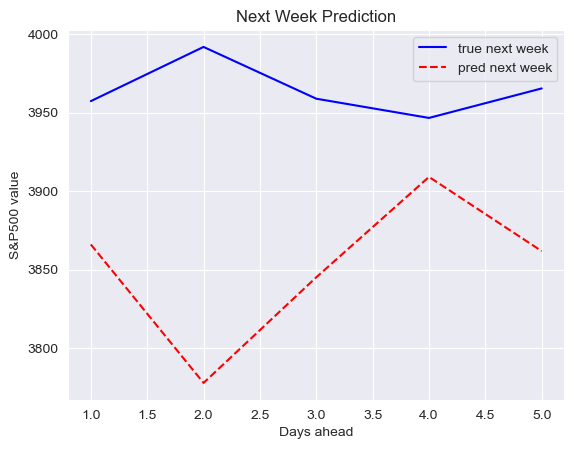

Text(0.5, 0, 'Days ahead')

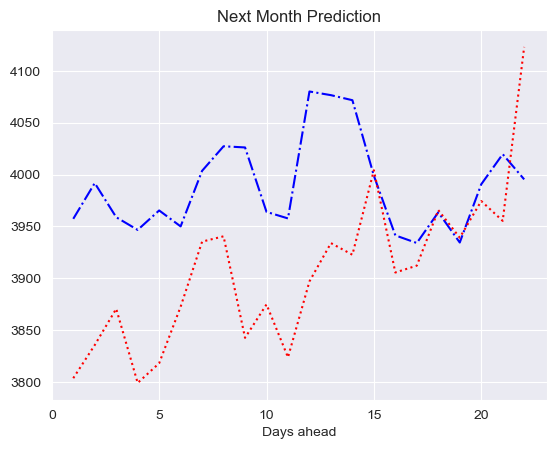

In [178]:
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
Y_actual = scaler_y.inverse_transform(np.vstack([test_data_gen[i][1] for i in range(len(test_data_gen))]))

sample_idx = 0

true_next_week = Y_actual[sample_idx, 1:1 + horizon_week]
pred_next_week = Y_pred[sample_idx, 1:1 + horizon_week]

true_next_month = Y_actual[sample_idx, 1 + horizon_week:1 + horizon_week + horizon_month]
pred_next_month = Y_pred[sample_idx, 1 + horizon_week:1 + horizon_week + horizon_month]

plt.figure()
plt.plot(range(1, 1 + horizon_week), true_next_week, 'b-', label='true next week')
plt.plot(range(1, 1 + horizon_week), pred_next_week, 'r--', label='pred next week')
plt.title('Next Week Prediction')
plt.xlabel('Days ahead')
plt.ylabel('S&P500 value')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 1 + horizon_month), true_next_month, 'b-.', label='true next month')
plt.plot(range(1, 1 + horizon_month), pred_next_month, 'r:', label='pred next month')
plt.title('Next Month Prediction')
plt.xlabel('Days ahead')

### B) Zhodnotíte Váš prístup a získaný výsledok

The LSTM approach was appropriate as it is a time series approach and allowed at least basic trends to be captured. However, the results are not ideal 🙃 due to the complexity of financial markets. Improving them would require more thorough model tuning, a richer choice of input variables and possibly more complex model architectures. P.S. Thanks for your time) Have a good day.